In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Part1: Process mining

In [2]:
patient = pd.read_csv('PatientTreatment.csv')
patient

,patient,action,resource,DateTime
0,patient 0,First consult,Dr. Anna,2017-01-02 11:40:11
1,patient 0,Blood test,Lab,2017-01-02 12:47:33
2,patient 0,Physical test,Nurse Jesse,2017-01-02 12:53:50
3,patient 0,Second consult,Dr. Anna,2017-01-02 16:21:06
4,patient 0,Surgery,Dr. Charlie,2017-01-05 13:23:09
...,...,...,...,...
685,patient 99,X-ray scan,Team 2,2017-05-25 11:03:27
686,patient 99,Physical test,Nurse Corey,2017-05-25 11:55:24
687,patient 99,Second consult,Dr. Anna,2017-05-29 15:12:39
688,patient 99,Medicine,Pharmacy,2017-05-29 16:17:13


### Question 1

In [3]:
patient['patient'].unique()

array(['patient 0', 'patient 1', 'patient 2', 'patient 3', 'patient 4',
       'patient 5', 'patient 6', 'patient 7', 'patient 8', 'patient 9',
       'patient 10', 'patient 11', 'patient 12', 'patient 13',
       'patient 14', 'patient 15', 'patient 16', 'patient 17',
       'patient 18', 'patient 19', 'patient 20', 'patient 21',
       'patient 22', 'patient 23', 'patient 24', 'patient 25',
       'patient 26', 'patient 27', 'patient 28', 'patient 29',
       'patient 30', 'patient 31', 'patient 32', 'patient 33',
       'patient 34', 'patient 35', 'patient 36', 'patient 37',
       'patient 38', 'patient 39', 'patient 40', 'patient 41',
       'patient 42', 'patient 43', 'patient 44', 'patient 45',
       'patient 46', 'patient 47', 'patient 48', 'patient 49',
       'patient 50', 'patient 51', 'patient 52', 'patient 53',
       'patient 54', 'patient 55', 'patient 56', 'patient 57',
       'patient 58', 'patient 59', 'patient 60', 'patient 61',
       'patient 62', 'patient 63', 'p

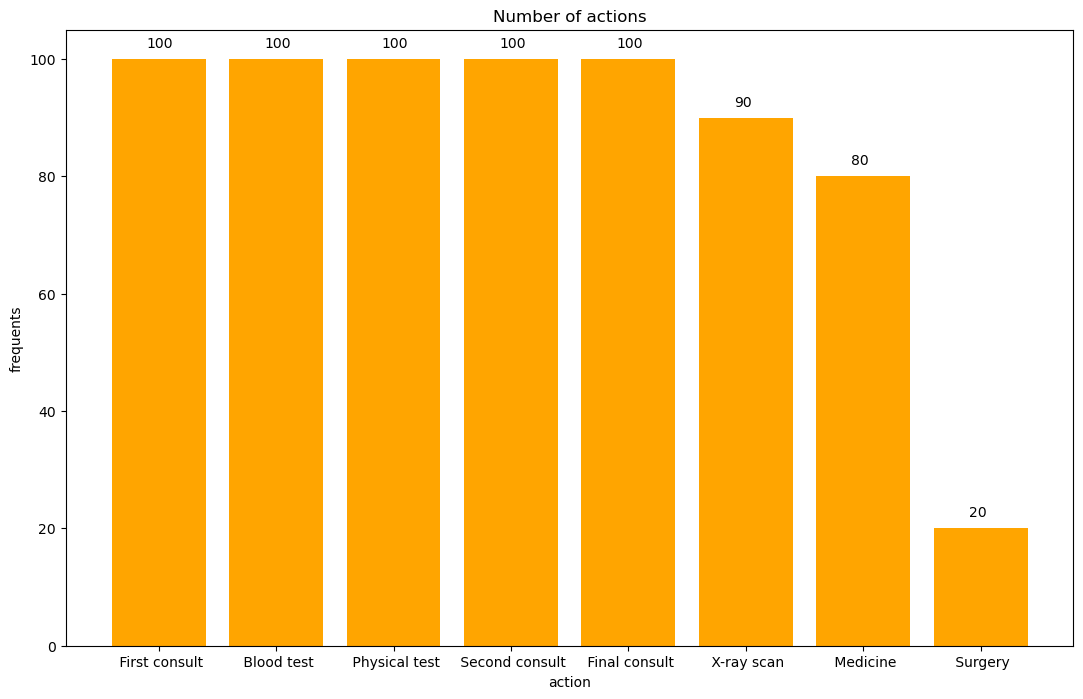

In [4]:
action = patient['action'].value_counts()
plt.figure(figsize=(13,8))
plt.bar(action.index, action.values, color = 'orange')
for i, j in zip(action.values, range(len(action.values))):
    plt.text(j - .1,i + 2 ,str(i))
plt.xlabel('action')
plt.ylabel('frequents')
plt.title('Number of actions');

همان طور که مشاهده می کنید٬ First consult دارای بیشترین رخداد و Surgery دارای کمترین رخداد می باشد.

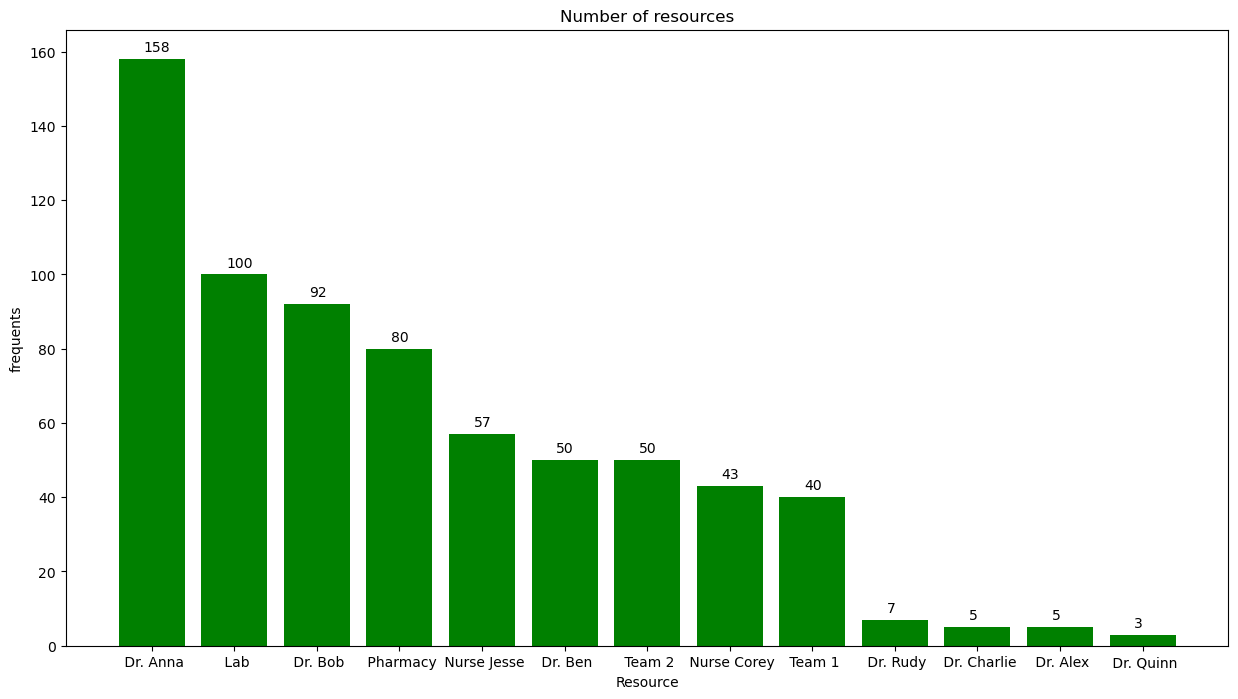

In [5]:
resource = patient['resource'].value_counts()
plt.figure(figsize=(15,8))
plt.bar(resource.index, resource.values, color = 'green')
for i, j in zip(resource.values, range(len(resource.values))):
    plt.text(j - .1,i + 2 ,str(i))
plt.xlabel('Resource')
plt.ylabel('frequents')
plt.title('Number of resources');

همان طور که مشاهده می کنید٬ Dr.Anna دارای بیشترین رخداد و Dr.Quinn دارای کمترین رخداد است.

### Question 2

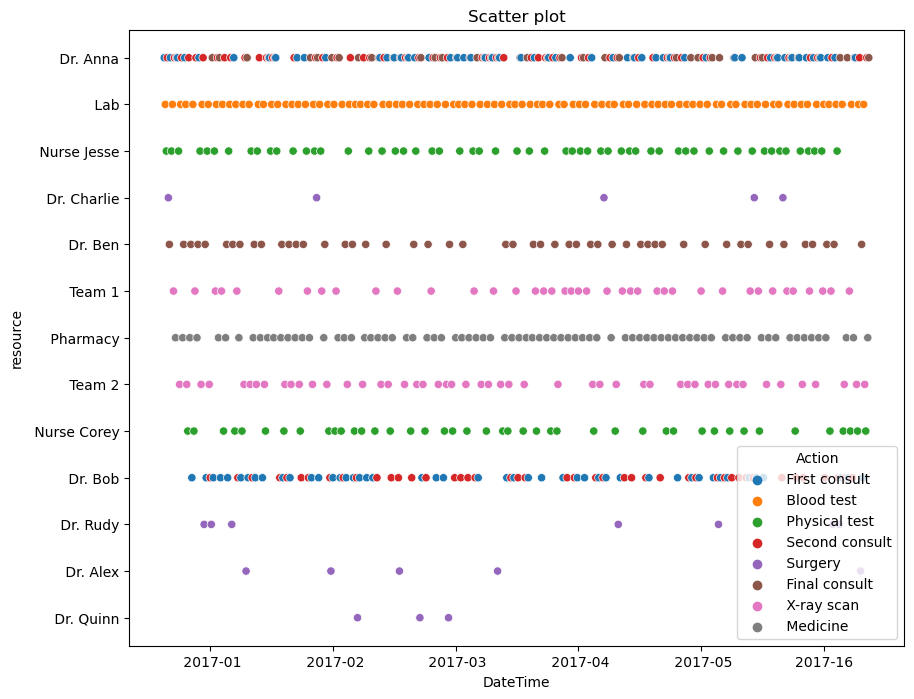

In [6]:
time = patient['DateTime'].apply(lambda x: x[0:8])
time = np.append(time.unique(),'2017-16')
plt.figure(figsize=(10,8))
scatter = sns.scatterplot(data=patient , x = 'DateTime', y = 'resource', hue = 'action')
scatter.set_xticks(range(45,patient.shape[0],120),time)
plt.legend(loc = 'lower right',title='Action')
plt.title('Scatter plot');


طبق چیزی که مشاهده می کنید اکثر دکتر ها مسئول انجام یک کار بخصوص است به جز دو دکتر که احتمالا آنها دکترعمومی بوده و یکسری کارها را همان موقع معاینه انجام میداده و در صورتی که نیاز به بررسی بیشتری است به منبع دیگری ارجاع می دهند.  

### Question 3

In [7]:
patient['patient'] = patient['patient'].astype('category')
patient['action'] = patient['action'].astype('category')
action_kinds = list(patient.action.unique())
df = pd.DataFrame(index= patient.patient, columns=action_kinds,data = 0)
for i in df.index:
    actions_patent = list(patient.loc[patient.patient == i]['action'] )
    df.loc[i,actions_patent] = 1


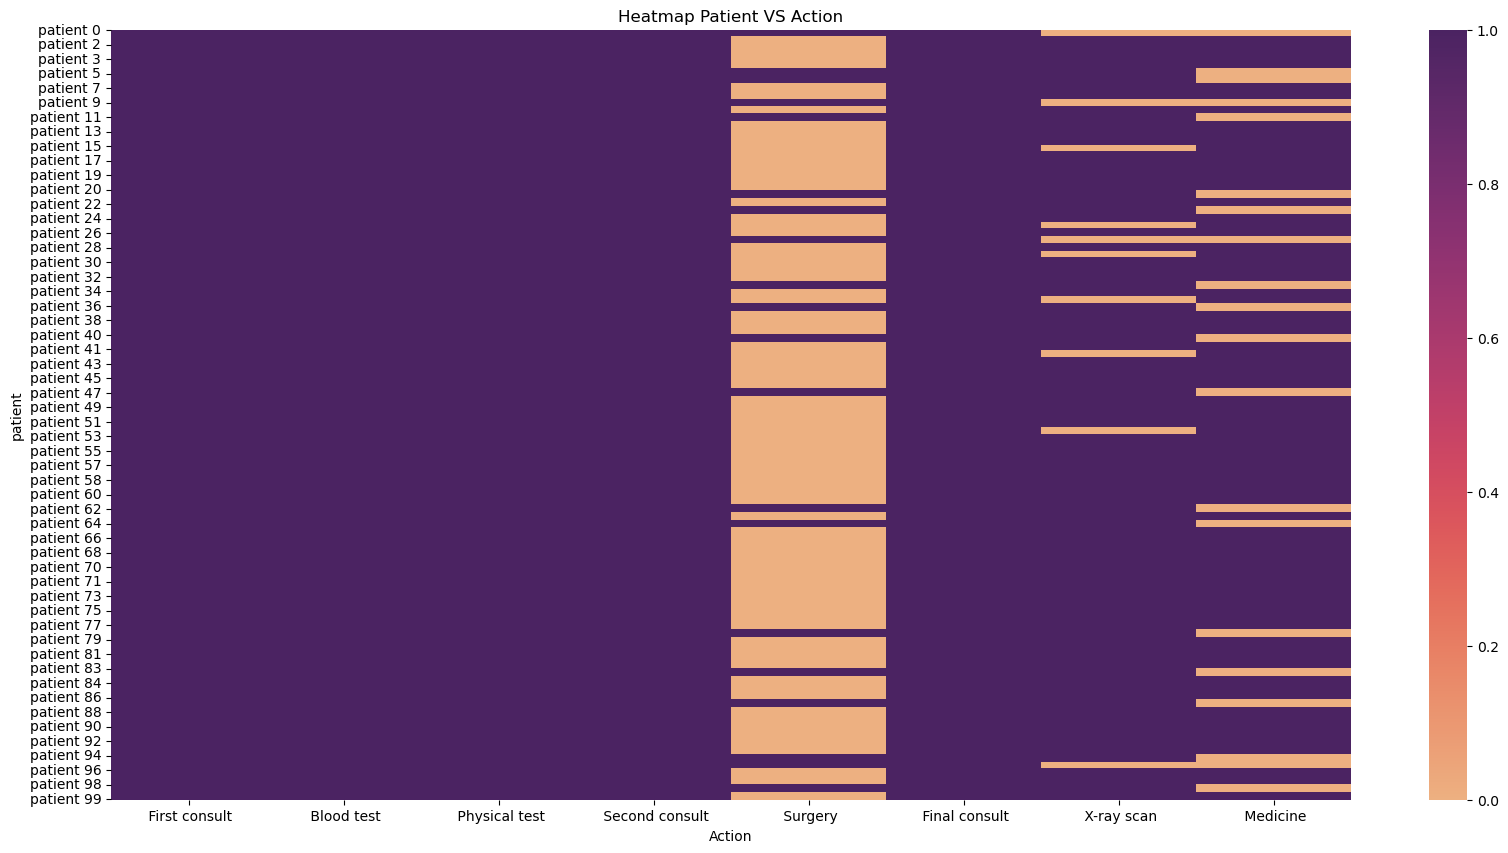

In [8]:
plt.figure(figsize=(20,10))
sns.heatmap(df,cmap=sns.color_palette("flare", as_cmap=True))
plt.xlabel('Action')
plt.title('Heatmap Patient VS Action');

زمانی که شما به دکترمراجعه می کنید٬ دکتر در ابتدا یکسری چکاپ های روتین را روی شما انجام می دهد و در صورتی که به مورد خاصی شک کند یکسری چکاپ های دیگری از شما خواهند گرفت.
ستون هایی که تماما بنفش هستند٬ از نوع اول چکاپ ها هستن و جز چکاپ های روتین هستند اما بقیه بنابه تشخیص دکتر٬ ممکن است انجام دهید یا نه.

### Question 4

In [9]:
take_long = pd.DataFrame({'patient' : patient.patient, 'action':patient.action })
patient['DateTime'] = pd.to_datetime(patient.DateTime)
for i in range(patient.shape[0]):
    p = patient.loc[i]['patient']
    
    index = patient.loc[(patient.patient == p) & (patient.action == ' First consult') ].index[0]
    time_to = patient.loc[(patient.patient == p) & (patient.action == ' First consult')]['DateTime']
    time_from = patient.loc[i]['DateTime']
    
    take_long.loc[i,'seconds'] = (time_from - time_to)[index].total_seconds()
   

In [10]:
sort_index = take_long.loc[take_long.action == ' Final consult'].sort_values('seconds', ascending = False)
float(sort_index.loc[sort_index.patient == take_long.loc[0,'patient']]['seconds'])

593357.0

In [11]:
for i in range(take_long.shape[0]):
    take_long.loc[i,'total_duration'] = float(sort_index.loc[sort_index.patient == take_long.loc[i,'patient']]['seconds'])

In [12]:
take_long.sort_values(['total_duration','seconds'],ascending=[True,True], inplace=True)

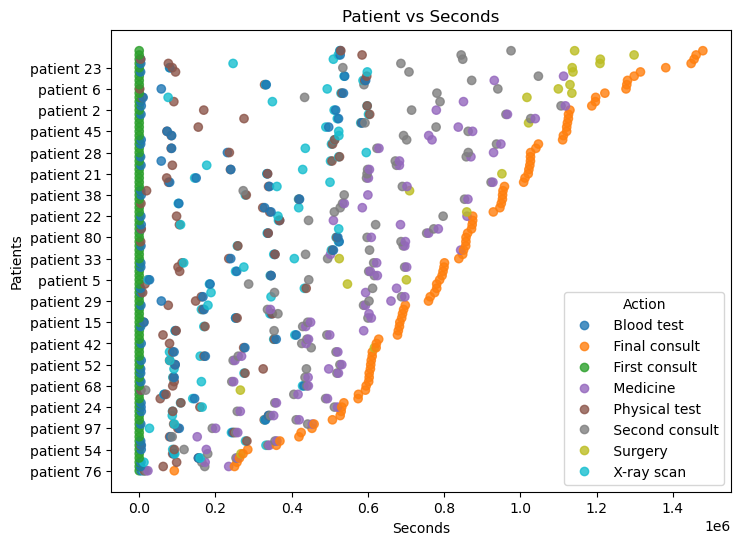

In [13]:
plt.figure(figsize=(8,6))
scatter = plt.scatter(take_long.seconds, take_long.patient,c = take_long.action.cat.codes,cmap = 'tab10', alpha = .8)
plt.yticks(range(0,len(take_long['patient'].unique()),5), take_long['patient'].unique()[0::5],fontsize = 10);
plt.legend(handles = scatter.legend_elements()[0], labels = list(take_long.action.cat.categories), title = 'Action');
plt.xlabel('Seconds')
plt.ylabel('Patients')
plt.title('Patient vs Seconds');

همان طور که مشاهده می کنید حداکثر مدت زمان فرایند درمان تقریبا ۱۴۰۰۰۰۰ ثانیه و حداقل ۱۰۰۰۰۰ ثانیه طول می کشد. عمل های جراحی نیز به طور میانگین ۱۰۰۰۰۰۰ ثانیه و تجویز داره حداکثر۱۱۰۰۰۰۰ ثانیه طول میکشد. تست خون و تست فیزیکی و اسکن نیز معمولا بین ۰ تا ۶۰۰۰۰۰ طول میکشد. 

### Question 5

In [14]:
patient.loc[patient.action == ' First consult']['patient'].count()

100

In [15]:
patient.loc[patient.action == ' Blood test']['patient'].count()

100

In [16]:
patient.loc[patient.action == ' Physical test']['patient'].count()

100

In [17]:
patient.loc[patient.action == ' X-ray scan']['patient'].count()

90

In [18]:
patient.loc[patient.action == ' Second consult']['patient'].count()

100

In [19]:
patient.loc[patient.action == ' Medicine']['patient'].count()

80

In [20]:
patient.loc[patient.action == ' Surgery']['patient'].count()

20

In [21]:
patient.loc[patient.action == ' Final consult']['patient'].count()

100

اکثر افراد با دارو مشکل بیماری شان حل شده است و فقط ۲۰ نفر احتیاج به عمل جراحی داشته اند. همچنین برای تشخیص دقیق بیماری معمولا آزمایش Blood test و Physical test وX-ray scan می دهند.   

### Question 6

In [22]:

surgery = pd.DataFrame({'patient': patient.loc[patient.action == ' Surgery']['patient']
                        ,'surgery':np.NAN})
surgery.reset_index(drop = True , inplace= True)
for i in range(surgery.shape[0]):
    p = surgery.loc[i]['patient']
    time_to = patient.loc[(patient.patient == p)&(patient.action == ' Second consult')]['DateTime']
    time_from = patient.loc[(patient.patient == p)&(patient.action == ' Surgery')]['DateTime']
    surgery.loc[i,'surgery'] = int((time_from.iloc[0] - time_to.iloc[0]).total_seconds()/60)


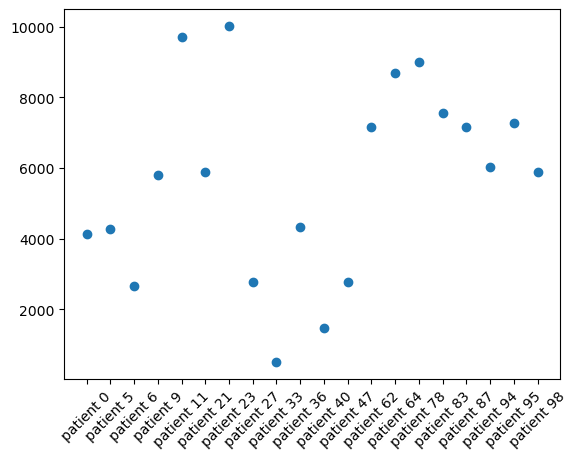

In [23]:
plt.scatter(surgery.patient,surgery.surgery, marker = 'o')
plt.xticks(rotation = 45);

همان طور که مشاهده می کنید معمولا جراحی ها بین ۴۰۰۰ تا ۸۰۰۰ دقیقه طول می کشد و حداکثر ۱۰۰۰۰دقیقه .

## Part 2: Business Analytic

In [24]:
import datetime as dt

In [25]:
transaction = pd.read_csv('transaction.csv')
transaction

,transaction_id,product_id,customer_id,transaction_date,online_order,product_size
0,1,2,2950,2017-02-25,0.0,medium
1,2,3,3120,2017-05-21,1.0,large
2,3,37,402,2017-10-16,0.0,medium
3,4,88,3135,2017-08-31,0.0,medium
4,5,78,787,2017-10-01,1.0,large
...,...,...,...,...,...,...
19995,19996,51,1018,2017-06-24,1.0,medium
19996,19997,41,127,2017-11-09,1.0,medium
19997,19998,87,2284,2017-04-14,1.0,medium
19998,19999,6,2764,2017-07-03,0.0,medium


In [26]:
transaction.transaction_date = pd.to_datetime(transaction.transaction_date)
transaction.product_size = transaction.product_size.astype('category')


In [27]:
transaction['tx_month'] = transaction['transaction_date'].apply(lambda x: dt.date(x.year,x.month,1))
transaction['acq_month'] = transaction.groupby('customer_id')['tx_month'].transform('min')


In [28]:
def diff_month(x):
    d1 = x['tx_month']
    d2 = x['acq_month']
    return ((d1.year - d2.year) * 12 + (d1.month - d2.month)) + 1
transaction['cohort_index'] = transaction.apply(lambda x: diff_month(x), axis = 1)


### Question 1:


In [92]:
cd = transaction.groupby(['acq_month','cohort_index'])['customer_id'].size().reset_index()
cc = cd.pivot_table(index = 'acq_month', columns = 'cohort_index', values = 'customer_id')
retention = cc.divide(cc.iloc[:,0], axis = 0)
retention = retention.round(3) * 100
cc

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12
acq_month,,,,,,,,,,,,
2017-01-01,1682.0,613.0,633.0,632.0,649.0,602.0,662.0,670.0,620.0,668.0,617.0,626.0
2017-02-01,1010.0,406.0,384.0,399.0,350.0,372.0,403.0,350.0,410.0,386.0,373.0,NaN
2017-03-01,617.0,215.0,222.0,217.0,228.0,221.0,223.0,268.0,237.0,235.0,NaN,NaN
2017-04-01,424.0,139.0,151.0,199.0,192.0,148.0,174.0,167.0,163.0,NaN,NaN,NaN
2017-05-01,276.0,109.0,103.0,106.0,82.0,92.0,92.0,103.0,NaN,NaN,NaN,NaN
2017-06-01,152.0,58.0,59.0,60.0,61.0,60.0,67.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,95.0,32.0,35.0,41.0,43.0,33.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,66.0,24.0,24.0,29.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,30.0,9.0,9.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


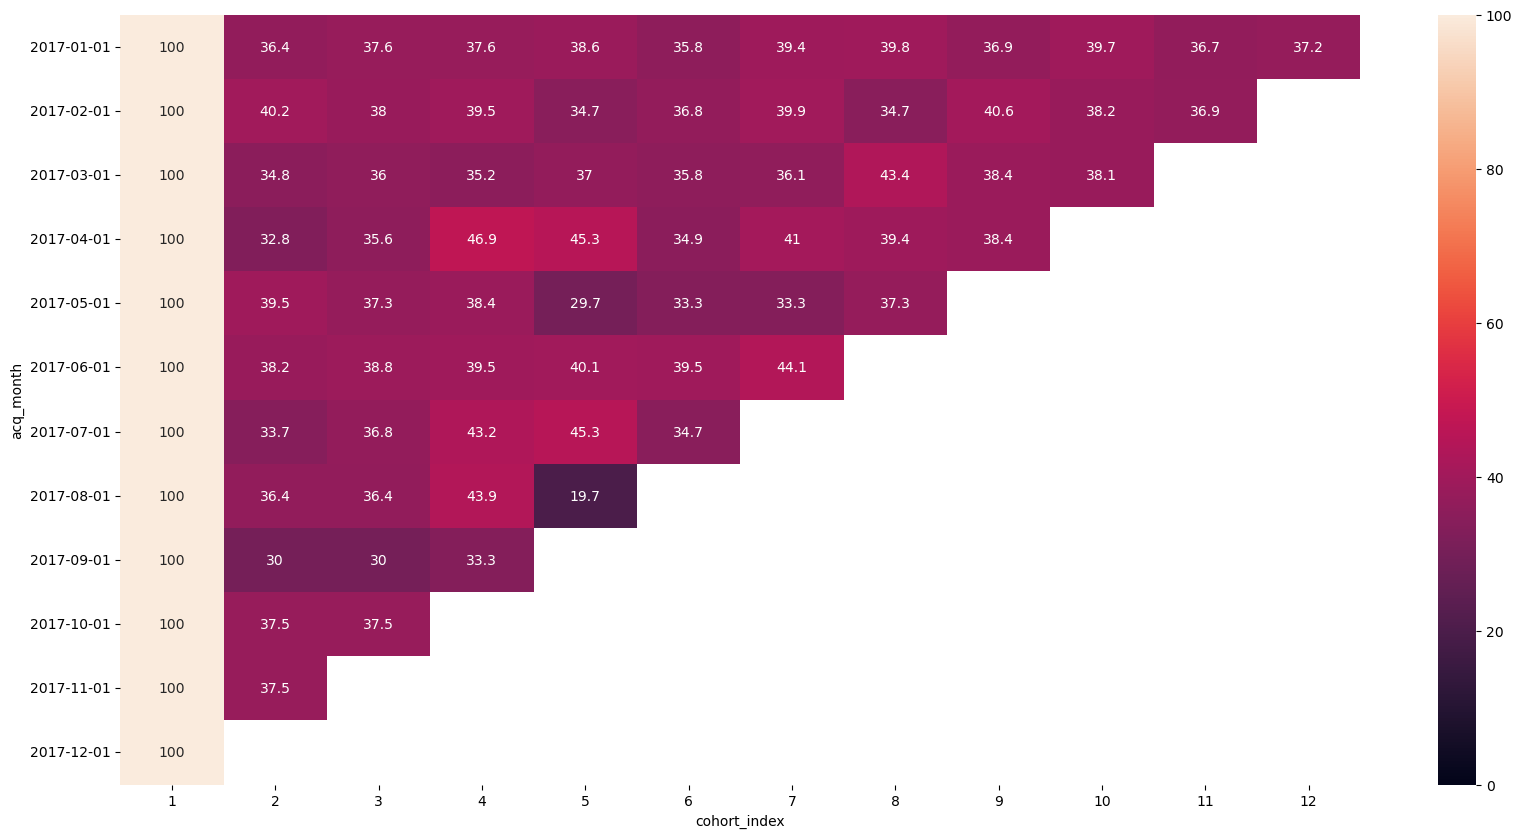

In [35]:
plt.figure(figsize=(20,10))
sns.heatmap(data = retention, annot= True, vmin= 0 , vmax= 100, fmt='g');

In [31]:
transaction.online_order.dropna(inplace = True)

In [33]:
online = transaction.loc[transaction.online_order == 1]
offline = transaction.loc[transaction.online_order == 0]

In [55]:
cc_on = online.groupby(['acq_month','cohort_index'])['customer_id'].size().reset_index()
cd_on = cc_on.pivot_table(index = 'acq_month', columns = 'cohort_index', values = 'customer_id')
retention_on = cd_on.divide(cd_on.iloc[:,0], axis = 0)
retention_on = retention_on.round(3) * 100

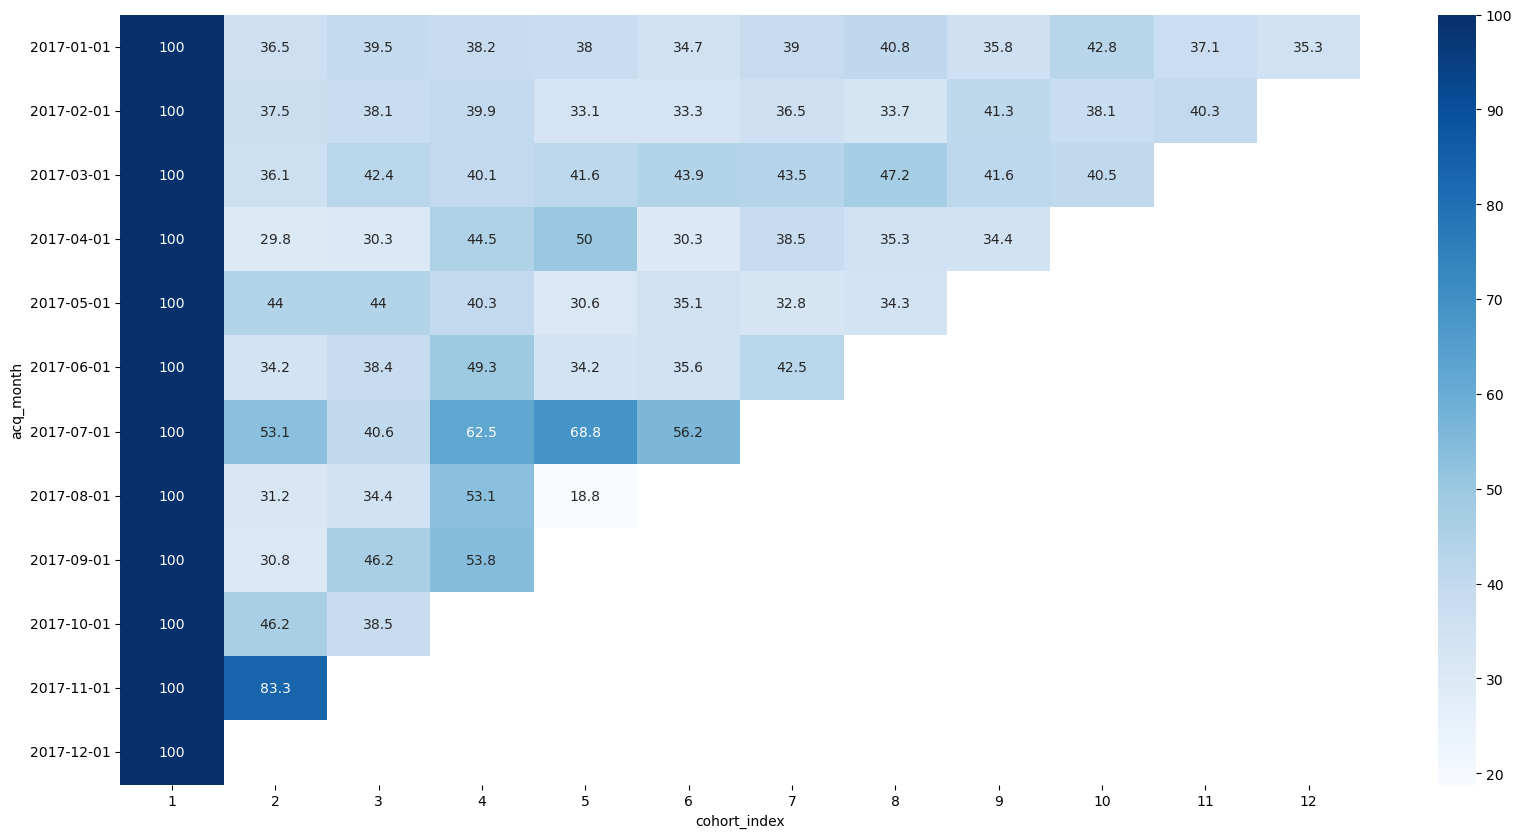

In [56]:
plt.figure(figsize=(20,10))
sns.heatmap(data = retention_on, annot= True , fmt='g', cmap= 'Blues');

In [59]:
cc_off = offline.groupby(['acq_month','cohort_index'])['customer_id'].size().reset_index()
cd_off = cc_off.pivot(index = 'acq_month', columns = 'cohort_index' , values = 'customer_id')
retention_off = cd_off.divide(cd_off.iloc[:,0], axis = 0)
retention_off = retention_off.round(3) * 100


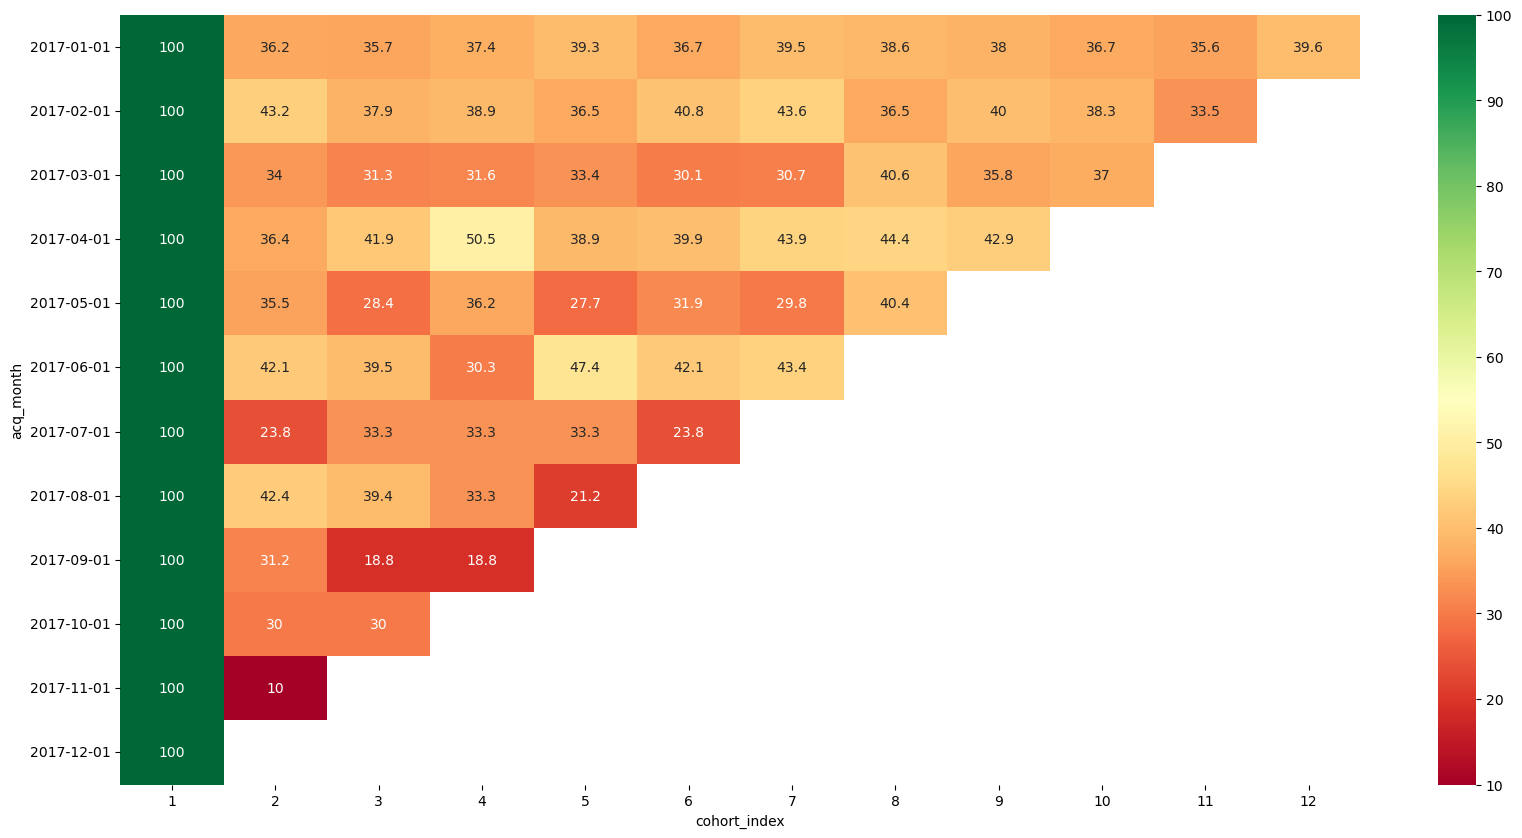

In [86]:
plt.figure(figsize=(20,10))
sns.heatmap(data = retention_off, annot= True, fmt= 'g' , cmap = 'RdYlGn');

#### Question2

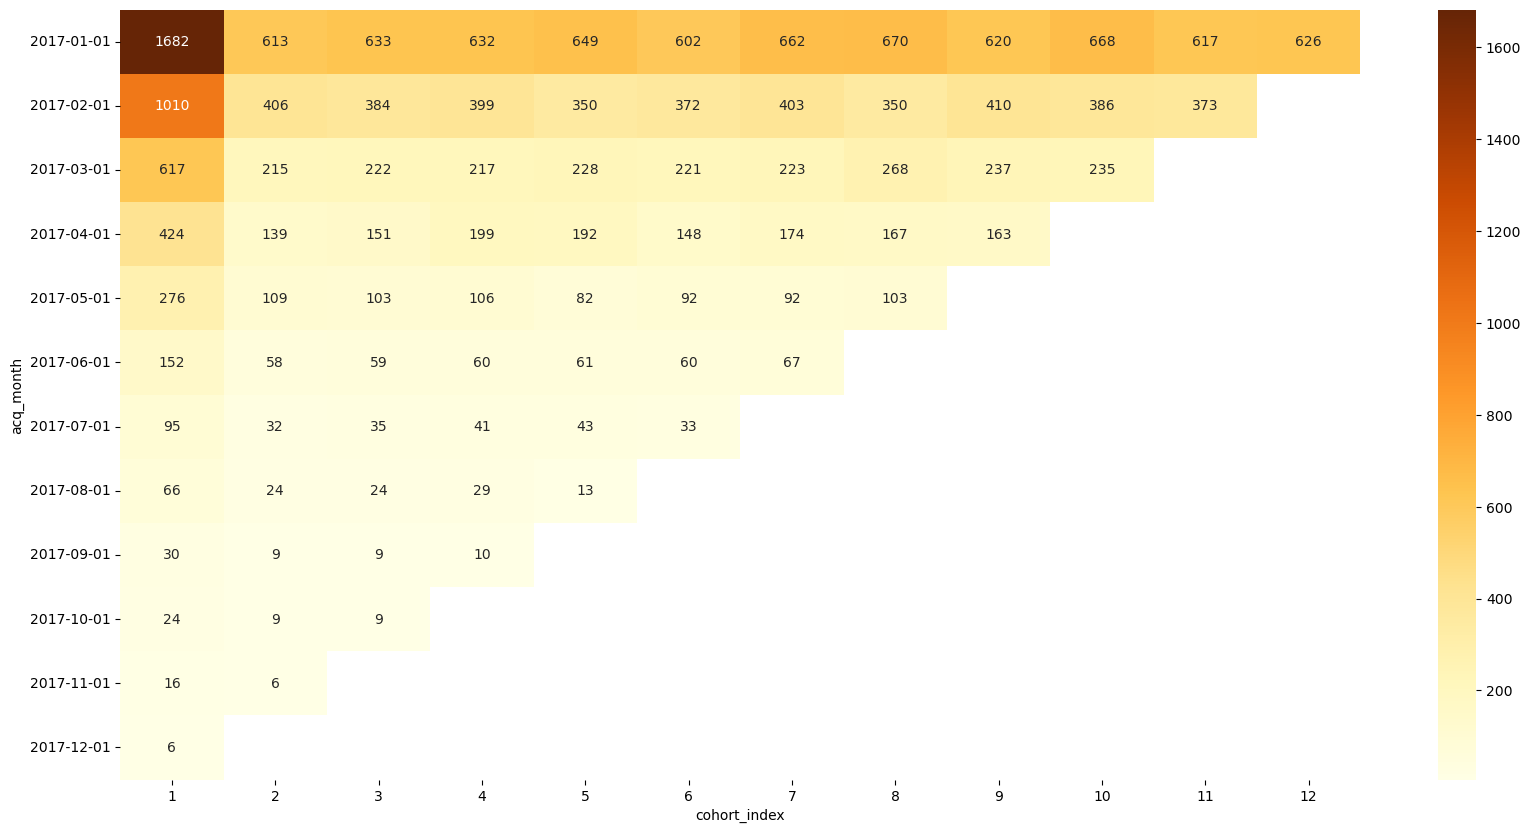

In [93]:
plt.figure(figsize=(20,10))
sns.heatmap(data = cc , annot= True, fmt='g', cmap='YlOrBr');

همان طور که مشاهده می کنید٬ در ماه اول از بالا به پایین مشتری های  کمتری  مراجعه میکنند در نتیجه ممکن است درسایت یا در قسمت حضوری مشکلی وجود داشته باشد. و هرچه به صورت افقی جلوتر می رویم مشتری های کمتری به سایت ما برمیگردند که نشان از پایین بودن retention rate است.